In [6]:
# TensorFlow와 필요한 모듈을 임포트합니다.
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam


In [2]:
# 데이터를 로드하고 준비합니다.
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # 데이터를 정규화합니다.


In [3]:
# 모델을 구성합니다.

base_model = tf.keras.VGG16(weights = 'imagenet', include_top=False, input_shape=(28,28))

model = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

base_model.trainable = False

# 모델을 컴파일합니다.
model.compile(optimizer=Adam(learning_rate = 1e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


c:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
# 모델을 훈련하고 평가합니다.
model.fit(x_train, y_train, epochs=10)
model.evaluate(x_test, y_test)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 830us/step - accuracy: 0.9900 - loss: 0.0314
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 820us/step - accuracy: 0.9918 - loss: 0.0260
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 826us/step - accuracy: 0.9931 - loss: 0.0223
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 842us/step - accuracy: 0.9948 - loss: 0.0171
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 832us/step - accuracy: 0.9961 - loss: 0.0134
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 829us/step - accuracy: 0.9971 - loss: 0.0109
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 818us/step - accuracy: 0.9975 - loss: 0.0093
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 824us/step - accuracy: 0.9977 - loss: 0.0080
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 817us/step - accuracy: 0.9979 - loss: 0.0073
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 812us/step - accuracy: 0.9983 - loss: 0.0059
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 512us/step - accuracy: 0.9740 - loss: 0.1056


[0.08889678865671158, 0.9772999882698059]

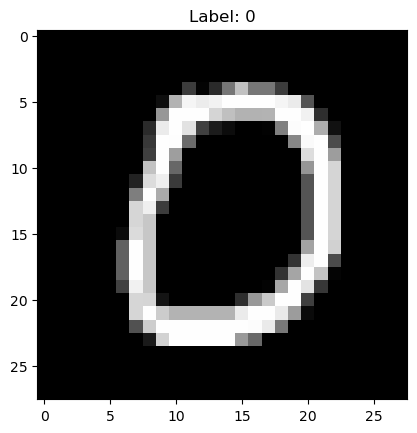

In [25]:
import matplotlib.pyplot as plt

# 첫 번째 훈련 이미지 출력
plt.imshow(x_test[10], cmap='gray')
plt.title('Label: ' + str(y_test[10]))
plt.show()

In [26]:
model.predict(x_test[[10]])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


array([[1.0000000e+00, 4.3272098e-17, 4.9945751e-08, 4.0507094e-14,
        1.2741428e-26, 1.1370826e-11, 5.4167483e-14, 1.1377155e-12,
        8.3862198e-17, 1.7105090e-11]], dtype=float32)